Saving IMG_3678.HEIC to IMG_3678 (2).HEIC


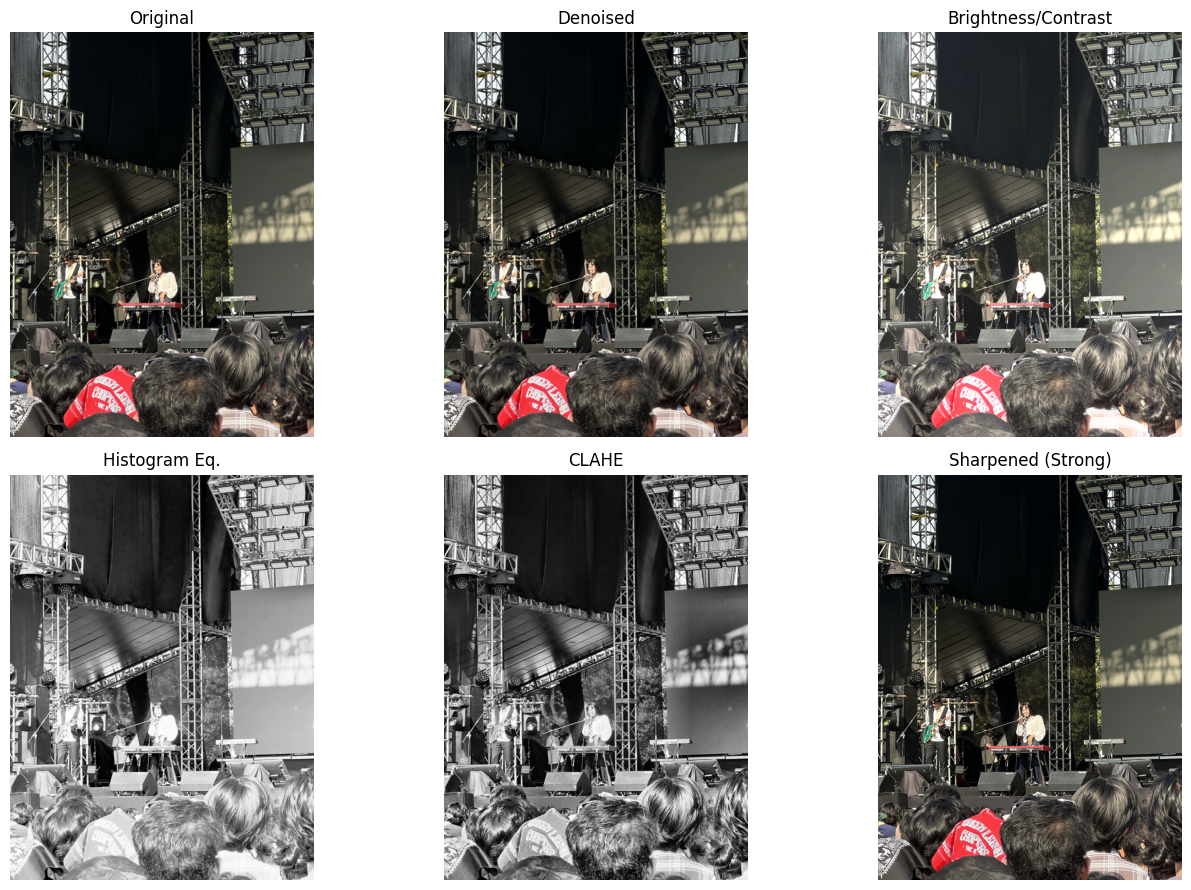

In [17]:
!pip install pillow pyheif opencv-python matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pyheif
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]

if filename.lower().endswith(".heic"):
    heif_file = pyheif.read(filename)
    pil_img = Image.frombytes(
        heif_file.mode,
        heif_file.size,
        heif_file.data,
        "raw",
        heif_file.mode,
        heif_file.stride,
    )
    img = np.array(pil_img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
else:
    img = cv2.imread(filename)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_denoised = cv2.fastNlMeansDenoisingColored(img, None, h=12, hColor=12, templateWindowSize=7, searchWindowSize=21)
img_bc = cv2.convertScaleAbs(img, alpha=1.2, beta=25)
gray_hist = cv2.equalizeHist(gray_img)
img_hist_eq = cv2.cvtColor(gray_hist, cv2.COLOR_GRAY2BGR)
clahe_proc = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8))
clahe_res = clahe_proc.apply(gray_img)
img_clahe = cv2.cvtColor(clahe_res, cv2.COLOR_GRAY2BGR)
gaussian_blur = cv2.GaussianBlur(img, (9,9), 10)
img_sharp = cv2.addWeighted(img, 1.7, gaussian_blur, -0.7, 0)

labels = ["Original", "Denoised", "Brightness/Contrast", "Histogram Eq.", "CLAHE", "Sharpened (Strong)"]
outputs = [img, img_denoised, img_bc, img_hist_eq, img_clahe, img_sharp]

plt.figure(figsize=(14,9))
for idx, (title, result) in enumerate(zip(labels, outputs)):
    plt.subplot(2, 3, idx+1)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()
